spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion.

spaCy comes with pretrained pipelines and currently supports tokenization and training for 60+ languages. It features state-of-the-art speed and neural network models for tagging, parsing, named entity recognition, text classification and more, multi-task learning with pretrained transformers like BERT, as well as a production-ready training system and easy model packaging, deployment and workflow management. spaCy is commercial open-source software, released under the MIT license.

- Support for 60+ languages
- Trained pipelines for different languages and tasks
- Multi-task learning with pretrained transformers like BERT
- Support for pretrained word vectors and embeddings
- State-of-the-art speed
- Production-ready training system
- Linguistically-motivated tokenization
- Components for named entity recognition, part-of-speech-tagging, dependency parsing, sentence segmentation, text classification, lemmatization, morphological analysis, entity linking and more
- Easily extensible with custom components and attributes
- Support for custom models in PyTorch, TensorFlow and other frameworks
- Built in visualizers for syntax and NER
- Easy model packaging, deployment and workflow management
- Robust, rigorously evaluated accuracy

In [1]:
#pip install spacy
import spacy

In [2]:
#We can load the English NLP pipeline in the following way:
#If you have not downloaded en_core_web_sm, it will give an error.
#Download it as follows: python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

If the nlp object is created, then it means that spaCy was installed and that models and data were successfully downloaded.

The nlp object is a language model instance. You can assume that nlp refers to the language model loaded by en_core_web_sm.

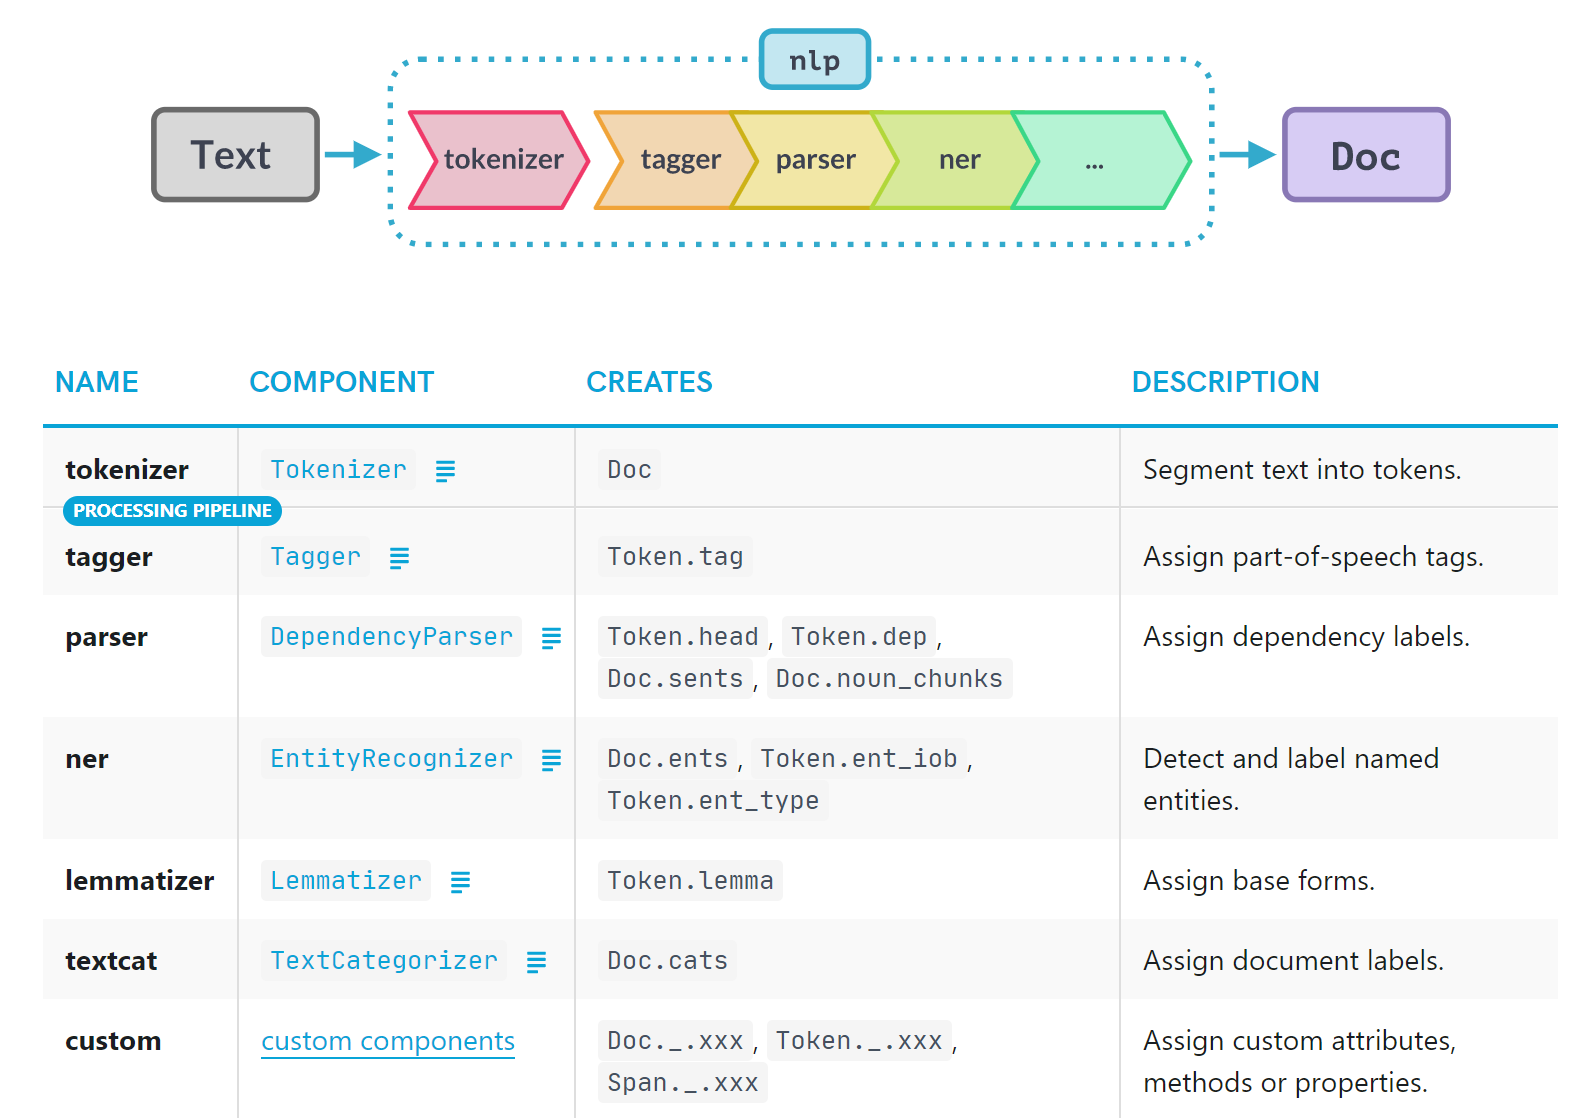

In [3]:
#Sentence Detection

about_text = ('Gus Proto is a Python developer currently working for a London-based Fintech company.\
              He is interested in learning Natural Language Processing.')
about_doc = nlp(about_text)
sentences = list(about_doc.sents)
print(len(sentences))
for sentence in sentences:
    print (sentence)

2
Gus Proto is a Python developer currently working for a London-based Fintech company.              
He is interested in learning Natural Language Processing.


In [4]:
# In the above example, spaCy is correctly able to identify sentences in the English language,
# using a full stop(.) as the sentence delimiter. 
# You can also customize the sentence detection to detect sentences on custom delimiters.

#Here’s an example, where an ellipsis(...) is used as the delimiter:
def set_custom_boundaries(doc):
# Adds support to use `...` as the delimiter for sentence detection
    for token in doc[:-1]:
        if token.text == '...':
            doc[token.i+1].is_sent_start = True
    return doc

ellipsis_text = ('Gus, can you, ... never mind, I forgot'
                 ' what I was saying. So, do you think'
                 ' we should ...')

# Load a new model instance
custom_nlp = spacy.load('en_core_web_sm')
custom_nlp.add_pipe(set_custom_boundaries, before='parser')
#Look at https://spacy.io/api/language#add_pipe
custom_ellipsis_doc = custom_nlp(ellipsis_text)
custom_ellipsis_sentences = list(custom_ellipsis_doc.sents)
for sentence in custom_ellipsis_sentences:
    print(sentence)




# Sentence Detection with no customization
ellipsis_doc = nlp(ellipsis_text)
ellipsis_sentences = list(ellipsis_doc.sents)
for sentence in ellipsis_sentences:
    print(sentence)

Gus, can you, ...
never mind, I forgot what I was saying.
So, do you think we should ...
Gus, can you, ... never mind, I forgot what I was saying.
So, do you think we should ...


In [5]:
#Tokenization

doc = nlp(u'Human ambition is the key to staying ahead of automation.')
for token in doc:
    print(token.text)

Human
ambition
is
the
key
to
staying
ahead
of
automation
.


In [6]:
#spaCy is trained to handle messy data, including emoticons and other web-based features

messyData = "lol that is rly funny :) This is gr8 i rate it 8/8!!!"
parsedData = nlp(messyData)
for token in parsedData:
    print(token.orth_, token.pos_, token.lemma_)


lol INTJ lol
that DET that
is AUX be
rly ADV rly
funny ADJ funny
:) PUNCT :)
This DET this
is AUX be
gr8 ADJ gr8
i PRON i
rate VERB rate
it PRON -PRON-
8/8 NUM 8/8
! PUNCT !
! PUNCT !
! PUNCT !


In [7]:
#Stop Words

spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print(len(spacy_stopwords),"\n\n")

for stop_word in list(spacy_stopwords)[:10]:
    print(stop_word)

326 


used
did
several
within
give
myself
back
they
has
thus


In [8]:
#Lemmatization

conference_help_text = ('Gus is helping organize a developer'
    'conference on Applications of Natural Language'
    ' Processing. He keeps organizing local Python meetups'
    ' and several internal talks at his workplace.')
conference_help_doc = nlp(conference_help_text)

for token in conference_help_doc:
    print (token, token.lemma_)

Gus Gus
is be
helping help
organize organize
a a
developerconference developerconference
on on
Applications Applications
of of
Natural Natural
Language Language
Processing Processing
. .
He -PRON-
keeps keep
organizing organize
local local
Python Python
meetups meetup
and and
several several
internal internal
talks talk
at at
his -PRON-
workplace workplace
. .


In [9]:
#Part-of-Speech Tagging

doc = nlp(u'John bought a 1982 car and Mary a motorcycle.')

#for token in doc:
#    print("\t".join( (token.text+"\t", str(token.idx), token.lemma_, token.pos_, token.tag_, token.dep_,
#          token.shape_, str(token.is_alpha), str(token.is_stop) )))

token_text = [token.text for token in doc]
token_idx = [token.idx for token in doc]   
token_lemma = [token.lemma_ for token in doc]
token_pos = [token.pos_ for token in doc]   
token_tag = [token.tag_ for token in doc]
token_dep = [token.dep_ for token in doc]   
token_shape = [token.shape_ for token in doc]
token_alpha = [token.is_alpha for token in doc]   
token_stop = [token.is_stop for token in doc]

import pandas as pd
pd.DataFrame(zip(token_text, token_idx, token_lemma, token_pos, token_tag, token_dep, token_shape, token_alpha, token_stop),
             columns=['text', 'IDX', 'lemma','POS','tag','dep','shape','alpha?','stop?'])

#shape_" Transform of the tokens’s string to show orthographic features. 
#Alphabetic characters are replaced by x or X, and numeric characters are replaced by d, 
#and sequences of the same character are truncated after length 4. For example,"Xxxx"or"dd".

#Explore meanings of other token attributes here: https://spacy.io/api/token#attributes

,text,IDX,lemma,POS,tag,dep,shape,alpha?,stop?
0,John,0,John,PROPN,NNP,nsubj,Xxxx,True,False
1,bought,5,buy,VERB,VBD,ROOT,xxxx,True,False
2,a,12,a,DET,DT,det,x,True,True
3,1982,14,1982,NUM,CD,nummod,dddd,False,False
4,car,19,car,NOUN,NN,dobj,xxx,True,False
5,and,23,and,CCONJ,CC,cc,xxx,True,True
6,Mary,27,Mary,PROPN,NNP,conj,Xxxx,True,False
7,a,32,a,DET,DT,det,x,True,True
8,motorcycle,34,motorcycle,NOUN,NN,appos,xxxx,True,False
9,.,44,.,PUNCT,.,punct,.,False,False


In [10]:
#Dependency Parse
#Using the same approach as above for PoS-tags, we can print the Dependency Parse relations:
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
          [child for child in token.children])

John nsubj bought VERB []
bought ROOT bought VERB [John, car, .]
a det car NOUN []
1982 nummod car NOUN []
car dobj bought VERB [a, 1982, and, Mary]
and cc car NOUN []
Mary conj car NOUN [motorcycle]
a det motorcycle NOUN []
motorcycle appos Mary PROPN [a]
. punct bought VERB []


In [11]:
#Named Entity Recognition
#Similarly to PoS-tags and Dependency Parse Relations, we can print out Named Entity labels:

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

John 0 4 PERSON
1982 14 18 DATE
Mary 27 31 PERSON


In [12]:
#We can extend the input with some more entities:

doc = nlp(u'Ali Hassan Kuban said that Apple Inc. will buy Google in May 2018.')
#The corresponding NE-labels are:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Ali Hassan Kuban 0 16 PERSON
Apple Inc. 27 37 ORG
Google 47 53 ORG
May 2018 57 65 DATE


In [13]:
#Another example

token_text = [token.text for token in doc]
token_idx = [token.idx for token in doc]   
token_lemma = [token.lemma_ for token in doc]
token_pos = [token.pos_ for token in doc]   
token_tag = [token.tag_ for token in doc]
token_dep = [token.dep_ for token in doc]   
token_shape = [token.shape_ for token in doc]
token_alpha = [token.is_alpha for token in doc]   
token_stop = [token.is_stop for token in doc]

import pandas as pd
pd.DataFrame(zip(token_text, token_idx, token_lemma, token_pos, token_tag, token_dep, token_shape, token_alpha, token_stop),
             columns=['text', 'IDX', 'lemma','POS','tag','dep','shape','alpha?','stop?'])

,text,IDX,lemma,POS,tag,dep,shape,alpha?,stop?
0,Ali,0,Ali,PROPN,NNP,compound,Xxx,True,False
1,Hassan,4,Hassan,PROPN,NNP,compound,Xxxxx,True,False
2,Kuban,11,Kuban,PROPN,NNP,nsubj,Xxxxx,True,False
3,said,17,say,VERB,VBD,ROOT,xxxx,True,False
4,that,22,that,SCONJ,IN,mark,xxxx,True,True
5,Apple,27,Apple,PROPN,NNP,compound,Xxxxx,True,False
6,Inc.,33,Inc.,PROPN,NNP,nsubj,Xxx.,False,False
7,will,38,will,VERB,MD,aux,xxxx,True,True
8,buy,43,buy,VERB,VB,ccomp,xxx,True,False
9,Google,47,Google,PROPN,NNP,dobj,Xxxxx,True,False


In [14]:
token_entity_type = [token.ent_type_ for token in doc]
token_entity_iob = [token.ent_iob_ for token in doc]

pd.DataFrame(zip(token_text, token_entity_type, token_entity_iob),
             columns=['token_text', 'entity_type', 'inside_outside_begin'])

,token_text,entity_type,inside_outside_begin
0,Ali,PERSON,B
1,Hassan,PERSON,I
2,Kuban,PERSON,I
3,said,,O
4,that,,O
5,Apple,ORG,B
6,Inc.,ORG,I
7,will,,O
8,buy,,O
9,Google,ORG,B


In [15]:
token_attributes = [(token.orth_,
                     token.is_stop,
                     token.is_punct,
                     token.is_space,
                     token.like_num,
                     token.is_oov)
                    for token in doc]

df = pd.DataFrame(token_attributes,
                  columns=['text',
                           'stop?',
                           'punctuation?',
                           'whitespace?',
                           'number?',
                           'out of vocab.?'])

df.loc[:, 'stop?':'out of vocab.?'] = (df.loc[:, 'stop?':'out of vocab.?']
                                       .applymap(lambda x: u'Yes' if x else u''))
                                               
df

,text,stop?,punctuation?,whitespace?,number?,out of vocab.?
0,Ali,,,,,Yes
1,Hassan,,,,,Yes
2,Kuban,,,,,Yes
3,said,,,,,Yes
4,that,Yes,,,,Yes
5,Apple,,,,,Yes
6,Inc.,,,,,Yes
7,will,Yes,,,,Yes
8,buy,,,,,Yes
9,Google,,,,,Yes


In [16]:
#Traversing a dependency tree

doc1='Sir Robin rode north, through the dark forest of Ewing, accompanied by his favorite minstrels.'
r2=nlp(doc1)
r2=list(r2.sents)[0]
#To drill down into the sentence, we can start with the root:
print(r2.root)
#That root has children:
print(list(r2.root.children))
print("-----------:All children:----------")
#Let's see all of the children for each word:
for word in r2: 
    print(word, ': ', str(list(word.children)))

rode
[Robin, north, ,, through, ,, accompanied, .]
-----------:All children:----------
Sir :  []
Robin :  [Sir]
rode :  [Robin, north, ,, through, ,, accompanied, .]
north :  []
, :  []
through :  [forest]
the :  []
dark :  []
forest :  [the, dark, of]
of :  [Ewing]
Ewing :  []
, :  []
accompanied :  [by]
by :  [minstrels]
his :  []
favorite :  []
minstrels :  [his, favorite]
. :  []


In [17]:
print(nlp.vocab.length)
print(list(nlp.vocab.strings))
#A storage class for vocabulary and other data shared across a language

575
['""', '#', '$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'BES', 'CC', 'CD', 'DT', 'EX', 'FW', 'GW', 'HVS', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NFP', 'NIL', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'XX', '_SP', '``', 'that', 'if', 'as', 'because', 'while', 'since', 'like', 'so', 'than', 'whether', 'although', 'though', 'unless', 'once', 'cause', 'upon', 'till', 'whereas', 'whilst', 'except', 'despite', 'wether', 'but', 'becuse', 'whie', 'it', 'w/out', 'albeit', 'save', 'besides', 'becouse', 'coz', 'til', 'ask', "i'd", 'out', 'near', 'seince', 'tho', 'sice', 'will', 'That', 'If', 'As', 'Because', 'While', 'Since', 'Like', 'So', 'Than', 'Whether', 'Although', 'Though', 'Unless', 'Once', 'Cause', 'Upon', 'Till', 'Whereas', 'Whilst', 'Except', 'Despite', 'Wether', 'But', 'Becuse', 'Whie', 'It', 'W/Out', 'Albeit', 'Save', 'Besides', 'Becouse', '

## Pattern Matching in spaCy

Let’s say we want to enable spaCy to find a combination of three tokens:

- A token whose lowercase form matches “hello”, e.g. “Hello” or “HELLO”.
- A token whose is_punct flag is set to True, i.e. any punctuation.
- A token whose lowercase form matches “world”, e.g. “World” or “WORLD”.


When writing patterns, keep in mind that each dictionary represents one token. If spaCy’s tokenization doesn’t match the tokens defined in a pattern, the pattern is not going to produce any results.

In [18]:


from spacy.matcher import Matcher

#First, we initialize the Matcher with a vocab. 
#The matcher must always share the same vocab with the documents it will operate on.
matcher = Matcher(nlp.vocab)

pattern = [{'LOWER': 'hello'}, {'IS_PUNCT': True}, {'LOWER': 'world'}]
matcher.add('HelloWorld', None, pattern)

doc = nlp(u'Hello, world! Hello... world!')
matches = matcher(doc)

#The match_id is the hash value of the string ID “HelloWorld”.
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)
print("-" * 50)
doc = nlp(u'Hello, world! Hello world!')
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

15578876784678163569 HelloWorld 0 3 Hello, world
15578876784678163569 HelloWorld 4 7 Hello... world
--------------------------------------------------
15578876784678163569 HelloWorld 0 3 Hello, world


In [19]:
#Optionally, we could also choose to add more than one pattern, 
#for example to also match sequences without punctuation between “hello” and “world”:

patterns = [
    [{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}],
    [{"LOWER": "hello"}, {"LOWER": "world"}]
]
matcher.add("HelloWorld", patterns)

doc = nlp(u'Hello, world! Hello... world! hello world')
matches = matcher(doc)

#The match_id is the hash value of the string ID “HelloWorld”.
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)
print("-" * 50)
doc = nlp(u'Hello, world! Hello world!')
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)
    
#Look at https://spacy.io/usage/rule-based-matching to find all possible token attributes that can be used in patterns

15578876784678163569 HelloWorld 0 3 Hello, world
15578876784678163569 HelloWorld 4 7 Hello... world
15578876784678163569 HelloWorld 8 10 hello world
--------------------------------------------------
15578876784678163569 HelloWorld 0 3 Hello, world
15578876784678163569 HelloWorld 4 6 Hello world


In [20]:
#Using the Dependency Parse Visualizer
from spacy import displacy
#doc = nlp(u'John said yesterday that Mary bought a new car for her older son.')
#doc = nlp(u"Dick ran and Jane danced yesterday.")
#doc = nlp(u"Tim Cook is the CEO of Apple.")
#doc = nlp(u"Born in a small town, she took the midnight train going anywhere.")
doc = nlp(u"John met Peter and Susan called Paul.")
displacy.render(doc, style='dep', jupyter=True, options={"distance": 120})

In [21]:
doc = nlp(u"John bought a 1982 car and Mary a motorcycle.")
displacy.render(doc, style='dep', jupyter=True, options={"distance": 120})

In [22]:
#Dependency Parsing Using spaCy
piano_text = 'Gus is learning piano'
piano_doc = nlp(piano_text)
for token in piano_doc:
    print (token.text, token.tag_, token.head.text, token.dep_)
displacy.render(piano_doc, style='dep', jupyter=True, options={"distance": 120})

Gus NNP learning nsubj
is VBZ learning aux
learning VBG learning ROOT
piano NN learning dobj


In [23]:
#Dependency Parsing Using spaCy
piano_text = 'Gus Proto is a Python developer currently working for a London-based Fintech company'
piano_doc = nlp(piano_text)
displacy.render(piano_doc, style='dep', jupyter=True, options={"distance": 120})

In [24]:
#Navigating the Tree and Subtree
#The dependency parse tree has all the properties of a tree. This tree contains information about sentence structure and grammar and can be traversed in different ways to extract relationships.
one_line_about_text = ('Gus Proto is a Python developer currently working for a London-based Fintech company')
one_line_about_doc = nlp(one_line_about_text)
# Extract children of `developer`
print([token.text for token in one_line_about_doc[5].children])

# Extract previous neighboring node of `developer`
print (one_line_about_doc[5].nbor(-1))

# Extract next neighboring node of `developer`
print (one_line_about_doc[5].nbor())

# Extract all tokens on the left of `developer`
print([token.text for token in one_line_about_doc[5].lefts])

# Extract tokens on the right of `developer`
print([token.text for token in one_line_about_doc[5].rights])

# Print subtree of `developer`
print (list(one_line_about_doc[5].subtree))

['a', 'Python', 'working']
Python
currently
['a', 'Python']
['working']
[a, Python, developer, currently, working, for, a, London, -, based, Fintech, company]


In [25]:
#In addition to the visualization of the Dependency Trees, we can visualize named entity annotations:
text = """Apple decided to fire Tim Cook and hire somebody called John Doe as the new CEO.
They also discussed a merger with Google. On the long run it seems more likely that Apple
will merge with Amazon and Microsoft with Google. The companies will all relocate to
Austin in Texas before the end of the century. John Doe bought a Prosche."""

doc = nlp(text)
displacy.render(doc, style='ent', jupyter=True)

In [26]:
#Noun Phrase Detection. Also called chunking.

conference_text = ('There is a developer conference happening on 21 July 2019 in London.')
conference_doc = nlp(conference_text)
# Extract Noun Phrases
for chunk in conference_doc.noun_chunks:
    print (chunk)

a developer conference
21 July
London


In [27]:
#Verb Phrase Detection
#spaCy has no built-in functionality to extract verb phrases, so you’ll need a library called textacy:
#!pip install textacy

In [28]:
import textacy
about_talk_text = ('The talk will introduce reader about Use'
                   ' cases of Natural Language Processing in'
                   ' Fintech')
pattern = r'(<VERB>?<ADV>*<VERB>+)'
verb_pattern = [{"POS": "VERB", "OP": "?"},{"POS": "ADV", "OP": "*"},{"POS": "VERB", "OP": "+"}]
about_talk_doc = textacy.make_spacy_doc(about_talk_text,
                                        lang='en_core_web_sm')
verb_phrases = textacy.extract.pos_regex_matches(about_talk_doc, pattern)
# Print all Verb Phrase
for chunk in verb_phrases:
    print(chunk.text)
print("-" * 50)

verb_phrases = textacy.extract.matches(about_talk_doc, verb_pattern)
# Print all Verb Phrase
for chunk in verb_phrases:
    print(chunk.text)
print("-" * 50)

# Extract Noun Phrase to explain what nouns are involved
for chunk in about_talk_doc.noun_chunks:
    print (chunk)

will introduce
--------------------------------------------------
will
will introduce
introduce
--------------------------------------------------
The talk
reader
Use cases
Natural Language Processing
Fintech


/home/gmanish/anaconda3/envs/py36/lib/python3.6/site-packages/textacy/extract.py:338: DeprecationWarning: `pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.
  action="once",


In [29]:
#Vectors
#To use vectors in spaCy, you might consider installing the larger models for the particular language. The common module and language packages only come with the small models.
doc = nlp(u"Apples and oranges are similar. Boots and hippos aren't.")

apples = doc[0]
oranges = doc[2]
boots = doc[6]
hippos = doc[8]

print(apples.similarity(oranges), boots.similarity(hippos))
print(apples.vector)

0.5622663 0.26719293
[ 1.94632515e-01  1.90247130e+00  4.42229843e+00 -6.12045527e-02
  1.74956012e+00  2.44772434e-02 -1.06967330e+00  7.93662667e-01
  1.00923896e+00  1.08250380e-01  1.82851136e+00  1.33768356e+00
  2.23511457e-03 -2.12197781e-01 -2.49786556e-01 -1.92293823e-01
  1.18495345e-01  4.72332716e+00 -6.03894949e-01  3.90162468e-01
  5.15963364e+00 -1.17993212e+00  1.36880779e+00  1.55028629e+00
 -1.18122196e+00 -7.06819952e-01 -5.48595762e+00 -7.37825632e+00
 -1.26462138e+00 -3.16612864e+00 -3.08464229e-01 -1.73858345e+00
 -3.20695341e-02 -2.36865306e+00  6.92661619e+00  2.14737701e+00
  4.53975528e-01  1.16615877e-01  4.90738988e-01  1.73382318e+00
  1.64489627e+00  6.74719810e-01 -2.78157687e+00 -2.42226219e+00
 -1.30427861e+00  2.57828975e+00  1.68508053e-01 -3.86403918e-01
 -5.82293510e-01  1.93566561e+00 -2.68726563e+00  1.42802048e+00
  1.34558558e-01 -7.05031931e-01 -3.63816500e+00 -2.33494210e+00
 -1.64434791e+00 -1.94939947e+00  3.30168247e+00  1.85050130e+00
  1.

/home/gmanish/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  # Remove the CWD from sys.path while we load stuff.


In [30]:
#Install larger model
#!python -m spacy download en_core_web_lg
#Takes around 20-30 minutes to install
nlpLarge = spacy.load('en_core_web_lg')

In [31]:
#%%capture output
tokens = nlpLarge(u'dog poodle beagle cat banana apple')
for token1 in tokens:
    for token2 in tokens:
        print(token1, token2, token1.similarity(token2))

dog dog 1.0
dog poodle 0.6750745
dog beagle 0.66592145
dog cat 0.8016855
dog banana 0.24327648
dog apple 0.2633902
poodle dog 0.6750745
poodle poodle 1.0
poodle beagle 0.7116687
poodle cat 0.573045
poodle banana 0.22574888
poodle apple 0.19250017
beagle dog 0.66592145
beagle poodle 0.7116687
beagle beagle 1.0
beagle cat 0.55627644
beagle banana 0.17828682
beagle apple 0.21266587
cat dog 0.8016855
cat poodle 0.573045
cat beagle 0.55627644
cat cat 1.0
cat banana 0.28154367
cat apple 0.28213844
banana dog 0.24327648
banana poodle 0.22574888
banana beagle 0.17828682
banana cat 0.28154367
banana banana 1.0
banana apple 0.5831844
apple dog 0.2633902
apple poodle 0.19250017
apple beagle 0.21266587
apple cat 0.28213844
apple banana 0.5831844
apple apple 1.0


In [32]:
n = 0
print(tokens[n].text, len(tokens[n].vector), tokens[n].vector)

dog 300 [-4.0176e-01  3.7057e-01  2.1281e-02 -3.4125e-01  4.9538e-02  2.9440e-01
 -1.7376e-01 -2.7982e-01  6.7622e-02  2.1693e+00 -6.2691e-01  2.9106e-01
 -6.7270e-01  2.3319e-01 -3.4264e-01  1.8311e-01  5.0226e-01  1.0689e+00
  1.4698e-01 -4.5230e-01 -4.1827e-01 -1.5967e-01  2.6748e-01 -4.8867e-01
  3.6462e-01 -4.3403e-02 -2.4474e-01 -4.1752e-01  8.9088e-02 -2.5552e-01
 -5.5695e-01  1.2243e-01 -8.3526e-02  5.5095e-01  3.6410e-01  1.5361e-01
  5.5738e-01 -9.0702e-01 -4.9098e-02  3.8580e-01  3.8000e-01  1.4425e-01
 -2.7221e-01 -3.7016e-01 -1.2904e-01 -1.5085e-01 -3.8076e-01  4.9583e-02
  1.2755e-01 -8.2788e-02  1.4339e-01  3.2537e-01  2.7226e-01  4.3632e-01
 -3.1769e-01  7.9405e-01  2.6529e-01  1.0135e-01 -3.3279e-01  4.3117e-01
  1.6687e-01  1.0729e-01  8.9418e-02  2.8635e-01  4.0117e-01 -3.9222e-01
  4.5217e-01  1.3521e-01 -2.8878e-01 -2.2819e-02 -3.4975e-01 -2.2996e-01
  2.0224e-01 -2.1177e-01  2.7184e-01  9.1703e-02 -2.0610e-01 -6.5758e-01
  1.8949e-01 -2.6756e-01  9.2639e-02  4.331

In [33]:
tokens = nlpLarge(u'dog cat banana hkjhuijhn')

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 7.0336733 False
cat True 6.6808186 False
banana True 6.700014 False
hkjhuijhn False 0.0 True


In [34]:
#We can now test for the context:

doc1 = nlpLarge(u"The labrador barked.")
doc2 = nlpLarge(u"The labrador swam.")
doc3 = nlpLarge(u"the labrador people live in canada.")

dog = nlpLarge(u"dog")

count = 0
for doc in [doc1, doc2, doc3]:
    count += 1
    print(str(count) + ":", doc.similarity(dog))

1: 0.6907751984080799
2: 0.5961927660740638
3: 0.579814502122575


In [35]:
#Using this strategy we can compute document or text similarities as well:
docs = ( nlpLarge(u"Paris is the largest city in France."),
        nlpLarge(u"Vilnius is the capital of Lithuania."),
        nlpLarge(u"An emu is a large bird.") )

for x in range(len(docs)):
    for y in range(len(docs)):
        print(x, y, docs[x].similarity(docs[y]))


0 0 1.0
0 1 0.7554966079333336
0 2 0.6921462554756126
1 0 0.7554966079333336
1 1 1.0
1 2 0.5668025741640493
2 0 0.6921462554756126
2 1 0.5668025741640493
2 2 1.0


In [36]:
#We can vary the word order in sentences and compare them:
docs = [nlpLarge(u"dog bites man"), nlpLarge(u"man bites dog"),
        nlpLarge(u"man dog bites"), nlpLarge(u"cat eats mouse")]

for doc in docs:
    for other_doc in docs:
        print('"' + doc.text + '"', '"' + other_doc.text + '"', doc.similarity(other_doc))

"dog bites man" "dog bites man" 1.0
"dog bites man" "man bites dog" 0.9999999711588186
"dog bites man" "man dog bites" 0.9999999726761114
"dog bites man" "cat eats mouse" 0.7096953502122842
"man bites dog" "dog bites man" 0.9999999711588186
"man bites dog" "man bites dog" 1.0
"man bites dog" "man dog bites" 0.999999971568008
"man bites dog" "cat eats mouse" 0.7096953494258684
"man dog bites" "dog bites man" 0.9999999726761114
"man dog bites" "man bites dog" 0.999999971568008
"man dog bites" "man dog bites" 1.0
"man dog bites" "cat eats mouse" 0.7096953505026842
"cat eats mouse" "dog bites man" 0.7096953502122842
"cat eats mouse" "man bites dog" 0.7096953494258684
"cat eats mouse" "man dog bites" 0.7096953505026842
"cat eats mouse" "cat eats mouse" 1.0


## Training an NER model

In [37]:
from __future__ import unicode_literals, print_function

In [38]:
import random
from pathlib import Path
from spacy.util import minibatch, compounding
TRAIN_DATA = [
    ("Who is Shaka Khan?", {"entities": [(7, 17, "PERSON")]}),
    ("I like London and Berlin.", {"entities": [(7, 13, "LOC"), (18, 24, "LOC")]}),
]

In [39]:
#We created a blank 'xx' model:
nlp = spacy.blank("xx")  # create blank Language class
#The language ID used for multi-language or language-neutral pipelines is xx
ner = nlp.create_pipe("ner")
nlp.add_pipe(ner, last=True)

In [40]:
#We add the named entity labels to the NER model:
for _, annotations in TRAIN_DATA:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])

In [41]:
#Assuming that the model is empty and untrained, we reset and initialize the weights randomly using:

nlp.begin_training()

/home/gmanish/anaconda3/envs/py36/lib/python3.6/site-packages/spacy/language.py:639: UserWarning: [W033] Training a new parser or NER using a model with an empty lexeme normalization table. This may degrade the performance to some degree. If this is intentional or this language doesn't have a normalization table, please ignore this warning.
  **kwargs


In [42]:
print(nlp.pipe_names)

['ner']


In [43]:
#We get all pipe-names in the model that are not our NER related pipes to disable them during training:

pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
print(other_pipes)

[]


In [44]:
#We can now disable the other pipes and train just the NER uing 100 iterations:

with nlp.disable_pipes(*other_pipes):  # only train NER
    for itn in range(100):
        random.shuffle(TRAIN_DATA)
        losses = {}
        # batch up the examples using spaCy's minibatch
        batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(
                texts,  # batch of texts
                annotations,  # batch of annotations
                drop=0.5,  # dropout - make it harder to memorise data
                losses=losses,
            )
        if itn%10==0:
            print("Losses", losses)

Losses {'ner': 9.899998903274536}
Losses {'ner': 6.600847482681274}
Losses {'ner': 4.414342749863863}
Losses {'ner': 2.6945687234401703}
Losses {'ner': 2.2282532565295696}
Losses {'ner': 1.0997974403126136}
Losses {'ner': 0.017078659241860805}
Losses {'ner': 0.5079166780883497}
Losses {'ner': 0.0005946192235484205}
Losses {'ner': 3.496462849941691e-07}


In [45]:
#We can test the trained model:

for text, _ in TRAIN_DATA:
    doc = nlp(text)
    print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
    print("Tokens", [(t.text, t.ent_type_, t.ent_iob_) for t in doc])

Entities [('London', 'LOC'), ('Berlin', 'LOC')]
Tokens [('I', '', 'O'), ('like', '', 'O'), ('London', 'LOC', 'B'), ('and', '', 'O'), ('Berlin', 'LOC', 'B'), ('.', '', 'O')]
Entities [('Shaka Khan', 'PERSON')]
Tokens [('Who', '', 'O'), ('is', '', 'O'), ('Shaka', 'PERSON', 'B'), ('Khan', 'PERSON', 'I'), ('?', '', 'O')]


In [46]:
#We can define the output directory where the model will be saved as the models folder in the directory where the notebook is running:

output_dir = Path("./models/")
if not output_dir.exists():
    output_dir.mkdir()
nlp.to_disk(output_dir)

In [47]:
#To make sure everything worked out well, we can test the saved model:
nlp2 = spacy.load(output_dir)
for text, _ in TRAIN_DATA:
    doc = nlp2(text)
    print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
    print("Tokens", [(t.text, t.ent_type_, t.ent_iob_) for t in doc])

Entities [('London', 'LOC'), ('Berlin', 'LOC')]
Tokens [('I', '', 'O'), ('like', '', 'O'), ('London', 'LOC', 'B'), ('and', '', 'O'), ('Berlin', 'LOC', 'B'), ('.', '', 'O')]
Entities [('Shaka Khan', 'PERSON')]
Tokens [('Who', '', 'O'), ('is', '', 'O'), ('Shaka', 'PERSON', 'B'), ('Khan', 'PERSON', 'I'), ('?', '', 'O')]


In [48]:
#more stuff here: https://github.com/explosion/spacy-notebooks/blob/master/notebooks/conference_notebooks/advanced_text_analysis.ipynb